# Evalution Metrics

## Classification problems metrics are:
 
   * Accuracy 
   * Precision(P)
   * Recall(R)
   * F1 score(F1)
   * AUC 
   * Log loss
   * Precision at k
   * Average precision at k
   * Mean average precision at k
   
  
## Regression problems evaluation metrics :

   * Mean absolute error
   * Mean squared error
   * Root mean squared error
   * Root mean squared logarithmic error
   * Mean percentage error
   * Mean absolute percentage error
   
But here we will look into evalutation metrics for Classification problems.
 

**When we have an equal number of positive and negative samples in a binary classification metric, we generally use accuracy, precision, recall and f1.**
 
 
 ### Accuracy : 
 It is one of the most straightforward metrics used in machine learning. It defines how accurate your model is. 
 
 CODE FOR CALCULATING ACCURACY IS:

In [1]:
def accuracy(y_true,y_pred):
    
    """
    param y_true : list of true values.
    param y_pred : list of predicted values.
    """
    
    #initalizing simple counter to count correct predictions.
    count_val = 0
    for i, j in zip(y_true,y_pred):
        
        if i == j:
            #if predicted value is equal to the true value then we will increase the counter by one.
            count_val += 1
            
    #return accuracy
    #which is correct predictions over the number of samples
    return count_val / len(y_true)
            

In [2]:
from sklearn import metrics

l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]


print(accuracy(l1,l2))

#sklearn function to calculate  accuracy 
metrics.accuracy_score(l1,l2)

0.625


0.625

**If we have skewed dataset then it's better to use precision evalutation metrices rather than accuracy.**


### Precision :

before diving into it let's make some clear in our head.

* **True Positive(TP)** : If our model correctly predict positive class it is true positive. 

* **True Negative(TN)** : if our model correctly predict negative class it is true negative.

* **False Positive(FP)** : if your model incorrectly(or falsely) predict positive class,  it it a false positive.

* **False Negative(FN)** : if your model incorrectly(or falsely) predict negative class,  it is false negative.


CODE TO CALCULATE TP,TN,FP AND FN.

In [3]:
#function to calculate true positive.
def true_positive(y_true,y_pred):
    """
    param y_true = list of true values
    param y_pred = list of predicted values
    return : number of true positive
    """
    
    #initalize 
    tp = 0
    for yt, yp in zip(y_true , y_pred):
        if yt == 1 and yp == 1:
            tp += 1
        
    
    return tp


In [4]:
#Function to calculate true negative
def true_negative(y_true,y_pred):
    """
    param y_true = list of true values
    param y_pred = list of predicted values
    return : number of true negative
    """
    
    #initalize 
    tn = 0
    for yt, yp in zip(y_true , y_pred):
        
        if yt == 0  and yp == 0:
            
            tn += 1
        
    
    return tn

In [5]:
#Function to calculate true negative
def false_positive(y_true,y_pred):
    """
    param y_true = list of true values
    param y_pred = list of predicted values
    return : number of false positive
    """
    
    #initalize 
    fp = 0
    for yt, yp in zip(y_true , y_pred):
        
        if yt == 0  and yp == 1:
            
            fp += 1
        
    
    return fp

In [6]:
#Function to calculate true negative
def false_negative(y_true,y_pred):
    """
    param y_true = list of true values
    param y_pred = list of predicted values
    return : number of false negative
    """
    
    #initalize 
    fn = 0
    for yt, yp in zip(y_true , y_pred):
        
        if yt == 1  and yp == 0:
            
            fn += 1
        
    
    return fn

In [7]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

true_positive(l1, l2)

2

In [8]:
false_positive(l1,l2)

1

In [9]:
false_negative(l1,l2)


2

In [10]:
true_negative(l1,l2)

3

If we define accuracy using the term above then we get :

   **Accuracy Score = (TP + TN)/(TP + TN + FP +FN**

In [11]:
def accuracy_v2(y_true,y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    param y_true: list of true values
    param y_pred: list of predicted values
    return: accuracy score
    """
    
    tp = true_positive(y_true,y_pred)
    tn = true_negative(y_true,y_pred)
    fp = false_positive(y_true,y_pred)
    fn = false_negative(y_true,y_pred)
    
    accuracy_score = (tn + tp)/(tn + tp + fp + fn)
    
    return accuracy_score
    

In [12]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]


#by using starting accuracy function
print(accuracy(l1,l2))

print(accuracy_v2(l1,l2))

metrics.accuracy_score(l1,l2)


0.625
0.625


0.625

~All the value are same this means we made no mistake up to here.

### Precision Definition :

 **Precision = TP/(TP + FP)**
 
 Lets take an example : 
 - TP : 8
 - TN : 80
 - FP : 10
 - FN : 2
 
 
PRECISION = 8/(8 + 10) = 0.44.
This means our model is correct 44.4% times when it's try to identify posititve samples.


CODE TO CALCULATE PRECISION

In [13]:
#Function to calculate precision

def precision(y_true,y_pred):
    """
    param y_true: list of true values
    param y_pred: list of predicted values
    return: precision
    """
    
    tp = true_positive(y_true,y_pred)
    fp = false_positive(y_true,y_pred)
    
    precision = (tp)/(tp + fp)
    
    return precision

In [14]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]


precision(l1,l2)

0.6666666666666666

### Recall:

**Recall = TP/(TP + FN)**


Lets take an example : 
 - TP : 8
 - TN : 80
 - FP : 10
 - FN : 2
 
 
Recall = 8/(8 + 2) = 0.80.
This means our model identified 80% of posititve samples correctly.



CODE TO CALCULATE RECALL

In [15]:
#Function to calculate precision

def recall(y_true,y_pred):
    """
    param y_true: list of true values
    param y_pred: list of predicted values
    return: recall
    """
    
    tp = true_positive(y_true,y_pred)
    fn = false_negative(y_true,y_pred)
    
    recall = (tp)/(tp + fn)
    
    return recall

In [16]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]


recall(l1,l2)

0.5

In [17]:
y_true = [0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0]

y_pred = [.02638412, 0.11114267, 0.31620708, 
0.0490937, 0.0191491, 0.17554844, 
0.15952202, 0.03819563, 0.11639273, 
0.079377, 0.08584789, 0.39095342, 
0.27259048, 0.03447096, 0.04644807, 
0.03543574, 0.18521942, 0.05934905, 
0.61977213, 0.33056815]

#### Creating a precision recall curve

In [18]:
precisions = []
recalls = []
#how we assumed these threshold is a long story

thresholds = [0.0490937, 0.05934905, 0.079377,
              0.08584789, 0.11114267, 0.11639273, 
              0.15952202, 0.17554844, 0.18521942, 
              0.27259048, 0.31620708, 0.33056815, 
              0.39095342, 0.61977213] 


#for every threshold, calculate predictions in binary
#and append their calculated precision and recalls
#to their respective lists
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]
    p = precision(y_true,temp_prediction)
    r = recall(y_true , temp_prediction)
    precisions.append(p)
    recalls.append(r)

In [19]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Precision')

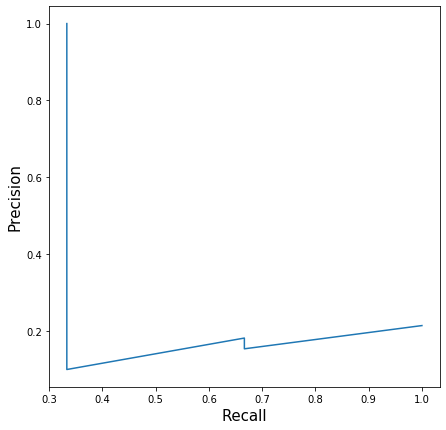

In [20]:
plt.figure(figsize = (7,7))
plt.plot(recalls,precisions)
plt.xlabel("Recall" ,fontsize = 15)
plt.ylabel("Precision",  fontsize = 15)

**~From the above curve we can see that it is quite challenging to chooes a value of threshold that gives both good precision and recall values.**

* If the threshold is too high, you have a smaller number of true positives and a high number of false negatives. This decreases your recall; however, your precision score will be high. 

* If you reduce the threshold too low, false positives will increase a lot, and precision will be loss.

### F1 Score:
F1 score is a metric that combines both the precision and recall. It is defined as a simple weighted average(harmonic mean) of precision and recall. If we denote precision using P and recall usinf R, we can represent the F1 score as:

**F1 = 2PR/(P + R)**

defining it using TP,FP and FN

**F1 = 2TP/(2TP + FP + FN)**


CODE FOR F1_SCORE

In [21]:
#Function to calculate F1_Score

def f1(y_true,y_pred):
    """
    param y_true: list of true values
    param y_pred: list of predicted values
    return: f1 score
    """
    
    p = precision(y_true,y_pred)
    r = recall(y_true,y_pred)
    
    score = 2*p*r/(p + r)
    
    return score

In [22]:
y_true = [0,0,0,1,0,0,0,0,0,0,
         1,0,0,0,0,0,0,0,1,0]


y_pred = [0,0,1,0,0,0,1,0,0,0,
         1,0,0,0,0,0,0,0,1,0]

f1(y_true,y_pred)

0.5714285714285715

In [23]:
#Using scikit learn 
metrics.f1_score(y_true, y_pred)

0.5714285714285715

~As the f1_score is same for both hence we calculated it correct.

* Instead of looking at precision and recall individually, you can also just look at F1 score.
* F1 Score ranges from 1 to 0.
* A perfect model will have F1 Score equal to 1.
* When dealing with dataset that is skewed targets, we should look for F1 Score rather than accuracy.


### TPR - True positive rate 

**TPR = TP/(TP + FN)**

Hence it is same as recall.But then also we will create a different TPR function.


CODE FOR TPR.

In [24]:
#function to calculate TPR
def tpr(y_true, y_pred):
    """
    param y_true: list of true values.
    param y_pred: list of predicted values.
    return: tpr/recall
    """
    
    return recall(y_true,y_pred)

**TPR OR RECALL ALSO KNOWN AS SENSITIVITY**

### FPR - false positive rate.
 
 **FPR = FP/ (FP + TN)**
 
 
 CODE FOR FPR

In [25]:
#function to calculate FPR
def fpr(y_true, y_pred):
    """
    param y_true: list of true values.
    param y_pred: list of predicted values.
    return: fpr
    """
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true , y_pred)
    return  fp/(tn + fp)

1-FPR KNOWN AS TNG(TRUE NEGATIVE RATE)

In [26]:
#empty lists to store tpr
#and fpr values

tpr_list = []
fpr_list = []

#actual targets
y_true = [0,0,0,0,1,0,1,0,0,1,0,1,0,0,1]


#predicted probabilities of the sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99] 

#handmade thresholds 
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0] 


#loop over all thresholds 
for thresh in thresholds:
    #calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    #calculate tpr
    temp_tpr = tpr(y_true, temp_pred)
    #calculate fpr 
    temp_fpr = fpr(y_true, temp_pred) 
    #append tpr and fpr to lists 
    tpr_list.append(temp_tpr) 
    fpr_list.append(temp_fpr) 

In [27]:
values = {"threshold":thresholds,"tpr":tpr_list,"fpr":fpr_list}

In [28]:
import pandas as pd
values  = pd.DataFrame(values)

In [29]:
values

,threshold,tpr,fpr
0,0.00,1.0,1.0
1,0.10,1.0,0.9
2,0.20,1.0,0.7
3,0.30,0.8,0.6
4,0.40,0.8,0.3
5,0.50,0.8,0.3
6,0.60,0.8,0.2
7,0.70,0.6,0.1
8,0.80,0.6,0.1
9,0.85,0.4,0.1


~If we plot the above table with TPR on y-axis and FPR on the x-axis, we will get the curve as given below.

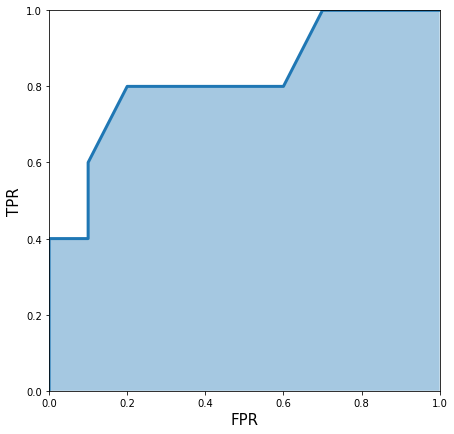

In [30]:
plt.figure(figsize = (7,7))
plt.fill_between(fpr_list , tpr_list, alpha = 0.4)
plt.plot(fpr_list , tpr_list , lw = 3)
plt.xlim(0,1.0)
plt.ylim(0, 1.0)
plt.xlabel("FPR", fontsize = 15)
plt.ylabel("TPR",fontsize = 15)
plt.show()

* This curve is also known as the RECEIVER OPERATING CHARATERISTIC(ROC). 
* And if we calculate the area under this ROC curve, we are calculating another metrics which is used very often when we have a dataset which has **Skewed binary targets**.
* This metric is known as AREA UNDER ROC CURVE OR AUC.

In [31]:
from sklearn import metrics

y_true = [0, 0, 0, 0, 1, 0, 1,0, 0, 1, 0, 1, 0, 0, 1] 

y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99] 

metrics.roc_auc_score(y_true, y_pred)  

0.8300000000000001

AUC values range from 0 to 1. 

- **AUC = 1** implies you have a perfect model. Most of the time, it means that you made some mistake with validation and should revisit data processing and validation pipeline of yours. If you didn’t make any mistakes, then congratulations, you have the best model one can have for the dataset you built it on. 

- **AUC = 0** implies that your model is very bad (or very good!). Try inverting the probabilities for the predictions, for example, if your probability for the positive class is p, try substituting it with 1-p. This kind of AUC may also mean that there is some problem with your validation or data processing. 

- **AUC = 0.5** implies that your predictions are random. So, for any binary classification problem, if I predict all targets as 0.5, I will get an AUC of 0.5. AUC values between 0 and 0.5 imply that your model is worse than random. Most of the time, it’s because you inverted the classes. If you try to invert your predictions, your AUC might become more than 0.5. AUC values closer to 1 are considered good. 



* AUC values between 0 and 0.5 imply that your model is worse than random. Most of the time, it’s because you inverted the classes. If you try to invert your predictions, your AUC might become more than 0.5. AUC values closer to 1 are considered good. 

### But what does AUC say about our model?

Suppose you get an AUC of 0.85 when you build a model.This means that if you select a random image from your dataset with (positive sample) and another random image(negative sample), then the positive saample image will rank higher than negative sample image with a probability of 0.85.


After calculating probabilities and AUC, you would want to make predictions on the test set. Depending on the problem and use-case, you might want to either have probabilities or actual classes. If you want to have probabilities, it’s effortless. You already have them. If you want to have classes, you need to select a threshold. In the case of binary classification, you can do something like the following. 

   **Prediction = Probability >= Threshold**

Which means, that prediction is a new list which contains only binary variables. An item in prediction is 1 if the probability is greater than or equal to a given threshold else the value is 0. And guess what, you can use the ROC curve to choose this threshold! The ROC curve will tell you how the threshold impacts false positive rate and true positive rate and thus, in turn, false positives and true positives. You should choose the threshold that is best suited for your problem and datasets. For example, if you don’t want to have too many false positives, you should have a high threshold value. This will, however, also give you a lot more false negatives. Observe the trade-off and select the best threshold. Let’s see how these thresholds impact true positive and false positive values. 

In [32]:
#empty lists to store true positive 
#and false positive values 

tp_list = [] 
fp_list = [] 

#actual targets 
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1] 

#predicted probabilities of a sample being 1 
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99] 

#some handmade thresholds 
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

#loop over thresholds:
for thresh in thresholds:
    #calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    
    #calculate tp 
    temp_tp = false_positive(y_true , temp_pred)
    
    #calculate fp
    temp_fp = false_positive(y_true , temp_pred)
    
    #append tp and fp to list 
    tp_list.append(temp_tp)
    fp_list.append(temp_fp)

In [33]:
values = {"threshold":thresholds,"tpr":tpr_list,"fpr":fpr_list}
values  = pd.DataFrame(values)
values

,threshold,tpr,fpr
0,0.00,1.0,1.0
1,0.10,1.0,0.9
2,0.20,1.0,0.7
3,0.30,0.8,0.6
4,0.40,0.8,0.3
5,0.50,0.8,0.3
6,0.60,0.8,0.2
7,0.70,0.6,0.1
8,0.80,0.6,0.1
9,0.85,0.4,0.1


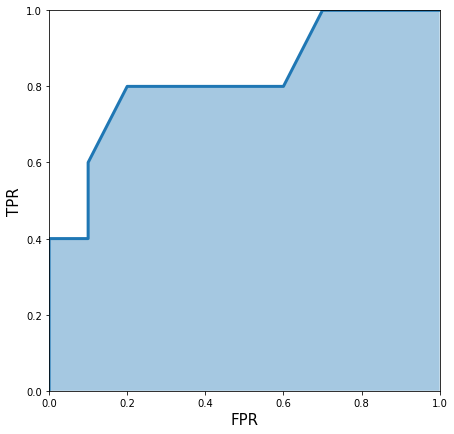

In [34]:
plt.figure(figsize = (7,7))
plt.fill_between(fpr_list , tpr_list, alpha = 0.4)
plt.plot(fpr_list , tpr_list , lw = 3)
plt.xlim(0,1.0)
plt.ylim(0, 1.0)
plt.xlabel("FPR", fontsize = 15)
plt.ylabel("TPR",fontsize = 15)
plt.show()

~AUC curve is widely used for skewed binary classification task in the industry.

Another important metric after learning AUC is **log loss**.

ShubhangiDabral13...